1. Without using Hidden layer and using circle dataset

Accuracy without hidden layer: 0.5000


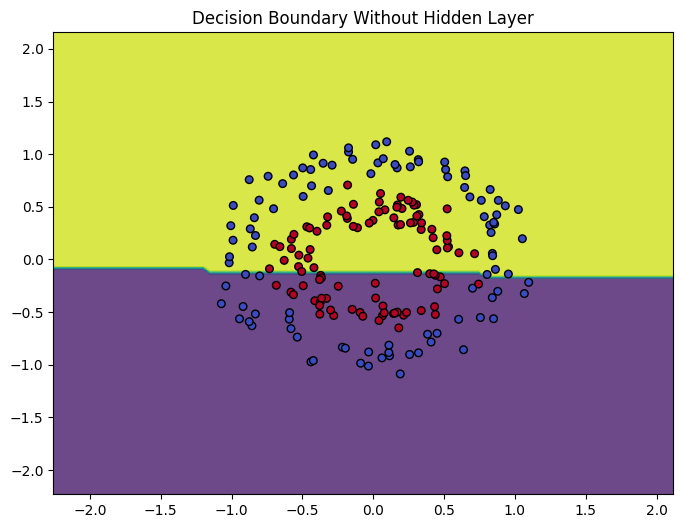

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Create the "circle" dataset
X, y = make_circles(n_samples=1000, noise=0.1, factor=0.5, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a neural network without hidden layers (no activation)
model = MLPClassifier(hidden_layer_sizes=(), activation='identity', max_iter=1000, random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy without hidden layer: {accuracy:.4f}")

# Plot decision boundary
plt.figure(figsize=(8, 6))
xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
                     np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', marker='o', s=30, cmap=plt.cm.coolwarm)
plt.title("Decision Boundary Without Hidden Layer")
plt.show()


2. With using Hidden layer using moon dataset

Accuracy with hidden layer and ReLU activation: 0.8750


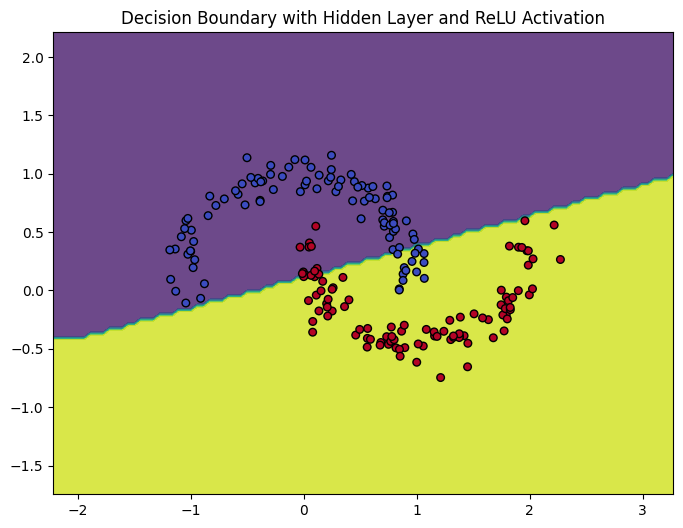

In [ ]:
# Train a neural network with one hidden layer and ReLU activation function
model_relu = MLPClassifier(hidden_layer_sizes=(5,), activation='relu', max_iter=1000, random_state=42)

# Fit the model on the training data
model_relu.fit(X_train, y_train)

# Predict on the test data
y_pred_relu = model_relu.predict(X_test)

# Calculate accuracy
accuracy_relu = accuracy_score(y_test, y_pred_relu)
print(f"Accuracy with hidden layer and ReLU activation: {accuracy_relu:.4f}")

# Plot decision boundary
plt.figure(figsize=(8, 6))
Z_relu = model_relu.predict(np.c_[xx.ravel(), yy.ravel()])
Z_relu = Z_relu.reshape(xx.shape)

plt.contourf(xx, yy, Z_relu, alpha=0.8)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', marker='o', s=30, cmap=plt.cm.coolwarm)
plt.title("Decision Boundary with Hidden Layer and ReLU Activation")
plt.show()
